In [1]:
import pandas as pd
import numpy as np
import spacy
import gensim
from collections import Counter 
import sklearn.cluster
from sklearn.model_selection import KFold
import random
from scipy.spatial import distance
import time

# Set of the random seed 
random.seed(0)

In [2]:
# PATHS
# This the path to run the main example, for your data change the path to your data
 
pathData = r'../data/raw_dataset/CPN120.csv'         # Path of the data to test the model
pathEmbedding = r'../data/embeddings/SBW-vectors-300-min5.bin.gz'  # For example in Spanish

In [3]:
# VARIABLES
numberCluster = 500 # Number of clusters for the k-means model
language = "spanish" #you can change to "english" or your preference lenguage

In [4]:
# Data import
# Relative Path of the dataset, change for your dataset
data = pd.read_csv(pathData, delimiter=",")

In [5]:
# Configuration of spacy
if language=="spanish":
    nlp = spacy.load('es_core_news_sm')
else:
    nlp = spacy.load('en_core_news_sm')

In [24]:
from nltk.stem.snowball import SnowballStemmer

def clean_text(text):
    """
    Recive a string and return the string in tokens without punctuations
    and in lowercase
    """
    # for each token in the sentence add to the list if is not a punctuation
    return [t for t in nlp(text.lower()) if not t.is_punct]
    
def normalize(tokens):
    """
    Recive al list of string and return in one string without stop words
    """
    # for each token if is not a stop word add the word to the list
    words = [t.orth_ for t in tokens if not t.is_stop]

    # return the tokens in one string
    return(" ".join(words))

def lemmatize(tokens):
    """
    Receive al list of tokens and return in one string without stop words 
    and Lemmatized
    """
    # for each token if is not a stop word add the lemma of the word in the list
    lemmas = [t.lemma_ for t in tokens if not t.is_stop]

    # return the tokens in one string
    return(" ".join(lemmas))

def stemming(tokens):
    stemmer = SnowballStemmer(language='spanish')
    return " ".join([stemmer.stem(str(t)) for t in tokens])

In [25]:
start = time.time()
# Normalize of the features
for i in range(len(data)):
    # if you want to lemmatize change the function 'normalize()' to 'lemmatize()'
    data.iloc[i,1] = stemming(clean_text(data.iloc[i,1]))
end = time.time()

print("Execution time:", end-start)

Execution time: 106.49334621429443


In [26]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

# Counter of each word 
contador = CountVectorizer()
tf = contador.fit_transform(data.iloc[:,1])

# TF-IDF vectorizer
transf = TfidfTransformer()
tfidf = transf.fit_transform(tf)


In [27]:
from sklearn.decomposition import TruncatedSVD

# Igualando los numeros de dimensiones con el Word2Vec
numDim = 1780 # es el numero de codificaciones existentes
# numDim = 33 # numero de conceptos
vocab = contador.get_feature_names_out()

lsa = TruncatedSVD(n_components=numDim, n_iter=100, random_state=42)
# U, Sigma, VT = np.linalg.svd(tfidf.toarray())
tfidf_lsa_data = lsa.fit_transform(tfidf)


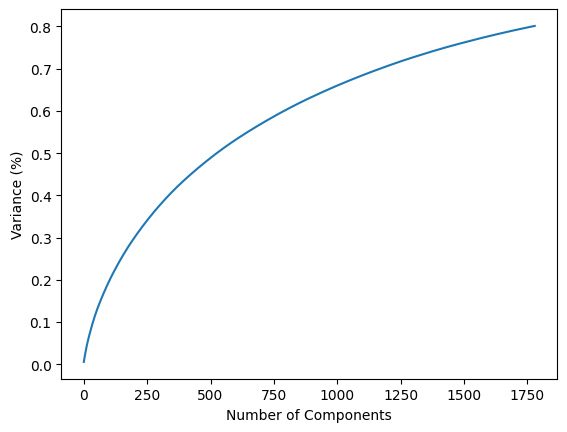

In [28]:
import matplotlib.pyplot as plt
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(lsa.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.show()